<a href="https://colab.research.google.com/github/mifm/examples/blob/master/Check_PV_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%%capture
!pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git

In [2]:
import time
import numpy as np
import pandas as pd

from hydesign.assembly.hpp_assembly import hpp_model
from hydesign.examples import examples_filepath

name = 'Denmark_good_wind'
examples_sites = pd.read_csv(f'{examples_filepath}examples_sites.csv', index_col=0,sep=';')
ex_site = examples_sites.loc[examples_sites.name == name]

longitude = ex_site['longitude'].values[0]
latitude = ex_site['latitude'].values[0]
altitude = ex_site['altitude'].values[0]

sim_pars_fn = examples_filepath+ex_site['sim_pars_fn'].values[0]
input_ts_fn = examples_filepath+ex_site['input_ts_fn'].values[0]

hpp = hpp_model(
        latitude=latitude,
        longitude=longitude,
        altitude=altitude,
        num_batteries = 10,
        work_dir = './',
        sim_pars_fn = sim_pars_fn,
        input_ts_fn = input_ts_fn,
        ptg_WACC=0.06,
        phasing_CAPEX=[0, 1],
        inflation=4*[0.04],

        # ppa_price = 29.354,
        # save_finance_ts=True,
        # save_battry_rf_filename='battery_rf.csv',
)

start = time.time()

# x=[15.0, 350.0, 2.0, 91.0, 6.583333333333333,
#     57.99999999999999, 44.791666666666664, 168.75, 1.0625,
#     73.0, 5.000000000000001, 4.583333333333333]
x=[55.0, 257.0, 10.000000000000002, 20.0, 5.916666666666667, 200.0, 28.125, 191.25, 1.4791666666666665, 27.0, 4.0, 8.75]
D = np.sqrt(4 * x[2] * 10 ** 6 / np.pi / x[1])
hh = x[0] + D / 2

outs = hpp.evaluate(*x)

hpp.print_design(x, outs)

end = time.time()
print('exec. time [min]:', (end - start)/60 )

print(hpp.prob['NPV_over_CAPEX'])



Fixed parameters on the site
-------------------------------
longitude = 8.594398
latitude = 56.227322
altitude = 85.0

Design:
---------------
clearance [m]: 55.000
sp [W/m2]: 257.000
p_rated [MW]: 10.000
Nwt: 20.000
wind_MW_per_km2 [MW/km2]: 5.917
solar_MW [MW]: 200.000
surface_tilt [deg]: 28.125
surface_azimuth [deg]: 191.250
DC_AC_ratio: 1.479
b_P [MW]: 27.000
b_E_h [h]: 4.000
cost_of_battery_P_fluct_in_peak_price_ratio: 8.750


NPV_over_CAPEX: 0.314
NPV [MEuro]: 118.957
IRR: 0.088
LCOE [Euro/MWh]: 36.793
Revenues [MEuro]: 35.194
CAPEX [MEuro]: 378.427
OPEX [MEuro]: 6.002
Wind CAPEX [MEuro]: 241.171
Wind OPEX [MEuro]: 4.671
PV CAPEX [MEuro]: 66.125
PV OPEX [MEuro]: 1.331
Batt CAPEX [MEuro]: 10.008
Batt OPEX [MEuro]: 0.000
Shared CAPEX [MEuro]: 61.123
Shared OPEX [MEuro]: 0.000
penalty lifetime [MEuro]: 0.000
AEP [GWh]: 936.360
GUF: 0.356
grid [MW]: 300.000
wind [MW]: 200.000
solar [MW]: 200.000
Battery Energy [MWh]: 108.000
Battery Power [MW]: 27.000
Total curtailment [GWh]: 133.4

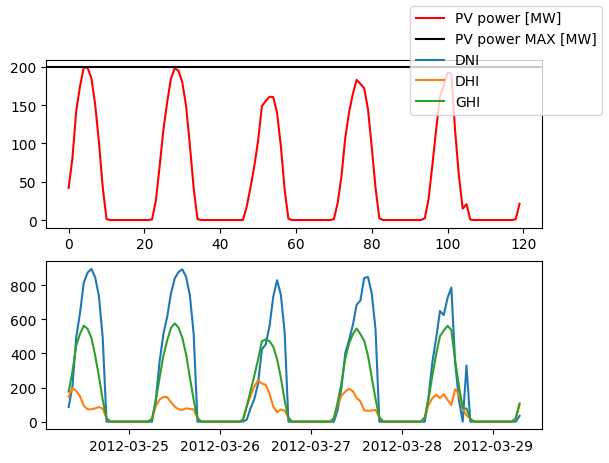

In [15]:
import matplotlib.pyplot as plt
solar_t = hpp.prob['pvp.solar_t']
weather = hpp.prob.model.pvp.weather
dni = weather.dni
dhi = weather.dhi
ghi = weather.ghi

time_start = 2000
n_days = 5
fig, ax = plt.subplots(2,1)
ax[0].plot(solar_t[time_start: time_start + n_days * 24], color='red', label='PV power [MW]')
ax[0].axhline(200, color='black', label='PV power MAX [MW]')
ax[1].plot(dni[time_start: time_start + n_days * 24], label='DNI')
ax[1].plot(dhi[time_start: time_start + n_days * 24], label='DHI')
ax[1].plot(ghi[time_start: time_start + n_days * 24], label='GHI')
fig.legend()
